<a href="https://colab.research.google.com/github/jaya-shankar/DSS_project/blob/main/model_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## setting up enviroment

In [1]:
!pip install tensorflow_decision_forests
!pip install wurlitzer

In [2]:
!rm -rf DSS_project
!git clone https://github.com/jaya-shankar/DSS_project.git

Cloning into 'DSS_project'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 185 (delta 89), reused 110 (delta 39), pack-reused 0
Receiving objects: 100% (185/185), 29.68 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [24]:
import pandas as pd
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [4]:
root_path = "/content/DSS_project/datasets"
raw_path = "/content/DSS_project/raw_datasets"


## fetching dataset

In [5]:
df = pd.read_csv(root_path+"/final_combined_df.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,above_65,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator
0,WA,2021-01-12,2292.0,76.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,17689.0,978.0,0.0,111.0
1,WA,2021-01-13,2327.0,40.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,22625.0,979.0,0.0,93.0
2,WA,2021-01-14,2437.0,40.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,0.0,983.0,0.0,93.0
3,WA,2021-01-15,2161.0,23.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,31581.0,966.0,0.0,105.0
4,WA,2021-01-17,2400.0,0.0,47.411715,-120.592492,102,81022.0,60.330912,15410562,...,15.4,68.0,2.55,10.3,15.03,40.76,0.0,889.0,0.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,171.0,4.0,38.642579,-80.613729,59,38878.0,30.112471,3587432,...,19.9,92.1,2.42,17.8,18.72,41.61,1025162.0,141.0,39.0,20.0
22341,WV,2022-04-06,107.0,25.0,38.642579,-80.613729,59,38878.0,30.112471,3587432,...,19.9,92.1,2.42,17.8,18.72,41.61,1026240.0,127.0,34.0,19.0
22342,WV,2022-04-07,87.0,8.0,38.642579,-80.613729,59,38878.0,30.112471,3587432,...,19.9,92.1,2.42,17.8,18.72,41.61,1026528.0,125.0,35.0,20.0
22343,WV,2022-04-08,92.0,4.0,38.642579,-80.613729,59,38878.0,30.112471,3587432,...,19.9,92.1,2.42,17.8,18.72,41.61,1026847.0,116.0,33.0,16.0


## Normalizing the dataset

In [6]:
no_normalization_columns = {'date','state_code','lat','long'}
columns = list(df.columns)
for column in columns:
  if column in no_normalization_columns:
    continue
  df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())*100
df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,above_65,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator
0,WA,2021-01-12,1.005387,2.969910,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.062773,4.497172,0.000000,12.052117
1,WA,2021-01-13,1.020739,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.080290,4.501770,0.000000,10.097720
2,WA,2021-01-14,1.068991,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.520164,0.000000,10.097720
3,WA,2021-01-15,0.947923,0.898789,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.112072,4.441992,0.000000,11.400651
4,WA,2021-01-17,1.052761,0.000000,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,48.314607,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.087920,0.000000,17.155266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,0.075009,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.876404,98.735955,37.168142,84.297521,31.354560,42.535487,3.638022,0.648365,0.803461,2.171553
22341,WV,2022-04-06,0.046936,0.976944,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.876404,98.735955,37.168142,84.297521,31.354560,42.535487,3.641848,0.583989,0.700453,2.062975
22342,WV,2022-04-07,0.038163,0.312622,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.876404,98.735955,37.168142,84.297521,31.354560,42.535487,3.642870,0.574792,0.721055,2.171553
22343,WV,2022-04-08,0.040356,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.876404,98.735955,37.168142,84.297521,31.354560,42.535487,3.644002,0.533407,0.679852,1.737242


In [7]:
df['cases'].max()

100.0

In [8]:
df.columns

Index(['state_code', 'date', 'cases', 'deaths', 'lat', 'long',
       'no_of_hospitals', 'miles_of_road', 'percent_democrat', 'population',
       'avg_income', 'mean_travel_time', 'above_65', 'percent_white',
       'persons_per_household', 'percent_in_poverty', 'avg_wind_speed',
       'avg_temp', 'people_fully_vaccinated', 'CurrentHospitalizations',
       'CurrentlyInICU', 'CurrentlyOnVentilator'],
      dtype='object')

## Assigning Importance

In [9]:
#dp_w -> decsion paratmeter weight
dp_w = {
                      "cases" : 0.3,
                     "deaths" : 0.2,
    "CurrentHospitalizations" : 0.07,
             "CurrentlyInICU" : 0.08,
      "CurrentlyOnVentilator" : 0.03,
    "people_fully_vaccinated" : 0.05,
            "no_of_hospitals" : 0.05,

                 "population" : 0.04,
      "persons_per_household" : 0.0025,
                   "above_65" : 0.03,

                 "avg_income" : 0.0025,
         "percent_in_poverty" : 0.025,

           "mean_travel_time" : 0.0025,

              "miles_of_road" : 0.0025,

             "avg_wind_speed" : 0.02,
                   "avg_temp" : 0.03,

           "percent_democrat" : 0.02,

              "percent_white" : 0.03,    
}

sum=0
for i in dp_w:
  sum+=dp_w[i]
sum

0.9850000000000001

In [10]:
# Ranking the risk level
risk_level = {1: [0,8],
              2: [8,12],
              3: [13,17],
              4: [17,25],
              5: [25,67]
            }

def decide_category(x):
  if x<=8:
    return 1
  elif x<=12:
    return 2
  elif x<=17:
    return 3
  elif x<=25:
    return 4
  else:
    return 5

## Adding risk level for existing dataset

In [12]:
df['risk_level'] = (df['cases']*dp_w['cases']+
                    df['deaths']*dp_w['deaths']+
                    df['CurrentHospitalizations']*dp_w['CurrentHospitalizations']+
                    df['CurrentlyInICU']*dp_w['CurrentlyInICU']+
                    df['CurrentlyOnVentilator']*dp_w['CurrentlyOnVentilator']+
                    (1-df['people_fully_vaccinated'])*dp_w['people_fully_vaccinated']+
                    (1-df['no_of_hospitals'])*dp_w['no_of_hospitals']+
                    df['population']*dp_w['population']+
                    df['persons_per_household']*dp_w['persons_per_household']+
                    df['above_65']*dp_w['above_65']+
                    df['avg_income']*dp_w['avg_income']+
                    df['percent_in_poverty']*dp_w['percent_in_poverty']+
                    df['mean_travel_time']*dp_w['mean_travel_time']+
                    (1-df['miles_of_road'])*dp_w['miles_of_road']+
                    df['avg_wind_speed']*dp_w['avg_wind_speed']+
                    df['avg_temp']*dp_w['avg_temp']+
                    df['percent_democrat']*dp_w['percent_democrat']+
                    df['percent_white']*dp_w['percent_white'])


In [13]:
df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator,risk_level
0,WA,2021-01-12,1.005387,2.969910,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.062773,4.497172,0.000000,12.052117,8.318994
1,WA,2021-01-13,1.020739,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.080290,4.501770,0.000000,10.097720,7.983054
2,WA,2021-01-14,1.068991,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.520164,0.000000,10.097720,8.002831
3,WA,2021-01-15,0.947923,0.898789,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.112072,4.441992,0.000000,11.400651,7.861659
4,WA,2021-01-17,1.052761,0.000000,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.087920,0.000000,17.155266,7.866810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,0.075009,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.638022,0.648365,0.803461,2.171553,10.095928
22341,WV,2022-04-06,0.046936,0.976944,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.641848,0.583989,0.700453,2.062975,10.235437
22342,WV,2022-04-07,0.038163,0.312622,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.642870,0.574792,0.721055,2.171553,10.104151
22343,WV,2022-04-08,0.040356,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.644002,0.533407,0.679852,1.737242,10.054268


In [14]:
df.dropna(inplace=True)
df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator,risk_level
0,WA,2021-01-12,1.005387,2.969910,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.062773,4.497172,0.000000,12.052117,8.318994
1,WA,2021-01-13,1.020739,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.080290,4.501770,0.000000,10.097720,7.983054
2,WA,2021-01-14,1.068991,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.520164,0.000000,10.097720,8.002831
3,WA,2021-01-15,0.947923,0.898789,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.112072,4.441992,0.000000,11.400651,7.861659
4,WA,2021-01-17,1.052761,0.000000,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.087920,0.000000,17.155266,7.866810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,0.075009,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.638022,0.648365,0.803461,2.171553,10.095928
22341,WV,2022-04-06,0.046936,0.976944,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.641848,0.583989,0.700453,2.062975,10.235437
22342,WV,2022-04-07,0.038163,0.312622,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.642870,0.574792,0.721055,2.171553,10.104151
22343,WV,2022-04-08,0.040356,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.644002,0.533407,0.679852,1.737242,10.054268


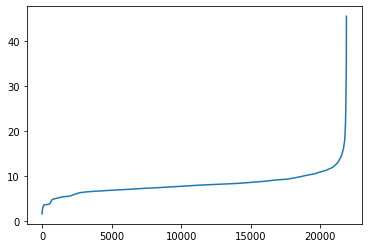

In [15]:
#For one column
import matplotlib.pyplot as plt
df_cpy = df.copy()
df_cpy.sort_values(by=['risk_level'], inplace=True)
df_cpy.reset_index(drop=True, inplace=True)
df_cpy['risk_level'].plot()
plt.show()
# #For Multiple Columns
# import matplotlib.pyplot as plt
# df[['Name Of Column1', 'Name Of Column2']].plot()
# plt.show()

In [16]:
df_cpy

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator,risk_level
0,TX,2022-04-03,0.400049,0.547089,31.447238,-99.317341,100.000000,100.000000,29.058065,73.325585,...,27.668539,76.106195,60.330579,14.247167,73.250122,62.638392,4.529360,0.000000,0.0,1.511656
1,TX,2022-03-28,0.300037,0.586166,31.447238,-99.317341,100.000000,100.000000,29.058065,73.325585,...,27.668539,76.106195,60.330579,14.247167,73.250122,62.472904,5.297282,0.000000,0.0,1.551497
2,TX,2022-03-27,0.150896,0.937866,31.447238,-99.317341,100.000000,100.000000,29.058065,73.325585,...,27.668539,76.106195,60.330579,14.247167,73.250122,62.465072,5.435232,0.000000,0.0,1.587142
3,TX,2022-04-08,1.154966,0.468933,31.447238,-99.317341,100.000000,100.000000,29.058065,73.325585,...,27.668539,76.106195,60.330579,14.247167,73.250122,62.787754,4.230469,0.000000,0.0,1.694109
4,TX,2022-04-04,1.079957,0.820633,31.447238,-99.317341,100.000000,100.000000,29.058065,73.325585,...,27.668539,76.106195,60.330579,14.247167,73.250122,62.648492,4.566147,0.000000,0.0,1.772407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21889,CA,2022-01-13,70.068254,9.534975,37.211164,-119.662127,69.494585,55.243896,57.176779,100.000000,...,21.067416,84.955752,42.975207,3.399892,60.548213,0.000000,59.442682,40.337866,0.0,37.163212
21890,CA,2022-01-20,71.435966,7.971864,37.211164,-119.662127,69.494585,55.243896,57.176779,100.000000,...,21.067416,84.955752,42.975207,3.399892,60.548213,0.000000,70.782177,50.824063,0.0,38.893564
21891,CA,2022-01-10,100.000000,5.939820,37.211164,-119.662127,69.494585,55.243896,57.176779,100.000000,...,21.067416,84.955752,42.975207,3.399892,60.548213,0.000000,50.802410,35.228677,0.0,44.410151
21892,CA,2022-01-17,97.044813,4.884721,37.211164,-119.662127,69.494585,55.243896,57.176779,100.000000,...,21.067416,84.955752,42.975207,3.399892,60.548213,0.000000,65.346944,45.014421,0.0,45.113552


In [17]:
df['risk_level'] =df['risk_level'].transform(lambda x: decide_category(x))
df

,state_code,date,cases,deaths,lat,long,no_of_hospitals,miles_of_road,percent_democrat,population,...,percent_white,persons_per_household,percent_in_poverty,avg_wind_speed,avg_temp,people_fully_vaccinated,CurrentHospitalizations,CurrentlyInICU,CurrentlyOnVentilator,risk_level
0,WA,2021-01-12,1.005387,2.969910,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.062773,4.497172,0.000000,12.052117,2
1,WA,2021-01-13,1.020739,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.080290,4.501770,0.000000,10.097720,1
2,WA,2021-01-14,1.068991,1.563111,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.520164,0.000000,10.097720,2
3,WA,2021-01-15,0.947923,0.898789,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.112072,4.441992,0.000000,11.400651,1
4,WA,2021-01-17,1.052761,0.000000,47.411715,-120.592492,16.245487,25.236151,48.836431,18.296147,...,64.887640,48.672566,22.314050,11.440907,40.455213,0.000000,4.087920,0.000000,17.155266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,WV,2022-04-04,0.075009,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.638022,0.648365,0.803461,2.171553,2
22341,WV,2022-04-06,0.046936,0.976944,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.641848,0.583989,0.700453,2.062975,2
22342,WV,2022-04-07,0.038163,0.312622,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.642870,0.574792,0.721055,2.171553,2
22343,WV,2022-04-08,0.040356,0.156311,38.642579,-80.613729,8.483755,11.859312,3.861565,3.123260,...,98.735955,37.168142,84.297521,31.354560,42.535487,3.644002,0.533407,0.679852,1.737242,2


In [18]:
df['risk_level'].value_counts(bins=5, sort=False)

(0.995, 1.8]    11844
(1.8, 2.6]       9095
(2.6, 3.4]        783
(3.4, 4.2]        127
(4.2, 5.0]         45
Name: risk_level, dtype: int64

In [30]:
train_df, test_df = train_test_split(df, test_size=0.3)
# # train_df = train_df.sample()
# # test_df = test_df.sample()
# train_df

In [ ]:
df_train = df.copy()
df_train.drop(columns=['state_code','date','lat','long'],inplace=True)
# Convert the dataset into a TensorFlow dataset.
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label="risk_level")
# test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="risk_level")

# Train a Random Forest model.
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

# Summary of the model structure.
model.summary()
model.save("/content/DSS_project/my_saved_model")

In [25]:
loaded_2 = keras.models.load_model("/content/DSS_project/my_saved_model")


In [29]:
loaded_2.compile(metrics=["accuracy"])

In [33]:
test_df.drop(columns=['state_code','date','lat','long'],inplace=True)
# Convert the dataset into a TensorFlow dataset.
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="risk_level")
evaluation = loaded_2.evaluate(test_ds, return_dict=True)
evaluation

KeyError: ignored

In [35]:
!zip -r /content/DSS_project/my_saved_model.zip /content/DSS_project/my_saved_model

  adding: content/DSS_project/my_saved_model/ (stored 0%)
  adding: content/DSS_project/my_saved_model/assets/ (stored 0%)
  adding: content/DSS_project/my_saved_model/assets/done (stored 0%)
  adding: content/DSS_project/my_saved_model/assets/data_spec.pb (deflated 26%)
  adding: content/DSS_project/my_saved_model/assets/random_forest_header.pb (deflated 91%)
  adding: content/DSS_project/my_saved_model/assets/header.pb (deflated 31%)
  adding: content/DSS_project/my_saved_model/assets/nodes-00000-of-00001 (deflated 82%)
  adding: content/DSS_project/my_saved_model/saved_model.pb (deflated 91%)
  adding: content/DSS_project/my_saved_model/keras_metadata.pb (deflated 89%)
  adding: content/DSS_project/my_saved_model/variables/ (stored 0%)
  adding: content/DSS_project/my_saved_model/variables/variables.index (deflated 25%)
  adding: content/DSS_project/my_saved_model/variables/variables.data-00000-of-00001 (deflated 49%)
